In [1]:
from numpy import *
from matplotlib.dates import datestr2num
from matplotlib.pyplot import *
from datetime import datetime

## AERONET LUNAR AOD DATA

### read all data of 2019, level 1.5


In [792]:
##AOD LEVEL 1.5 (no clouds but no calib) data from aeronet for all of year 2019, all bands
#read from columns 4 to 25 (aod 1640 to 340nm)
cols=arange(4, 26)

path='aeronet/lunar_aod/20190101_20191231_Santa_Cruz_Tenerife.lev15'
header=7

#DATA
data_aod=genfromtxt(path, delimiter=',', skip_header=header, usecols=cols)

#remove negative values (-999) and set to 0
non_negs=data_aod>=0
data_aod=non_negs*data_aod


#DATES
dates_str=genfromtxt(path, delimiter=',', skip_header=header, usecols=[0,1], dtype=str)
dates_list=[datetime.strptime(dates, '%d:%m:%Y') for dates in dates_str[:,0]]
times_list=[datetime.strptime(dates, '%H:%M:%S') for dates in dates_str[:,1]]
dates_aod=array([dates_list,times_list])



#BANDS
bands_aod=genfromtxt(path, delimiter=',', skip_header=header-1, skip_footer=len(data_aod), usecols=cols, dtype=str)

#find which bands have no data (take mean of bands and find indices diff. than 0)
means=mean(data_aod, axis=0)
non_empty_aod=array(nonzero(means))

data_aod

array([[ 0.063893,  0.084645,  0.102329, ..., -0.      , -0.      ,
        -0.      ],
       [ 0.064653,  0.087712,  0.104859, ..., -0.      , -0.      ,
        -0.      ],
       [ 0.071366,  0.091239,  0.11183 , ..., -0.      , -0.      ,
        -0.      ],
       ...,
       [ 0.023957,  0.055998,  0.054278, ..., -0.      , -0.      ,
        -0.      ],
       [ 0.024197,  0.055572,  0.054407, ..., -0.      , -0.      ,
        -0.      ],
       [ 0.025435,  0.056591,  0.054848, ..., -0.      , -0.      ,
        -0.      ]])

In [793]:
data_aod[5000:5000+nvalues,non_empty_aod[0,i]]

array([0.02579 , 0.023555, 0.023127, ..., 0.023957, 0.024197, 0.025435])

(0, 1200)

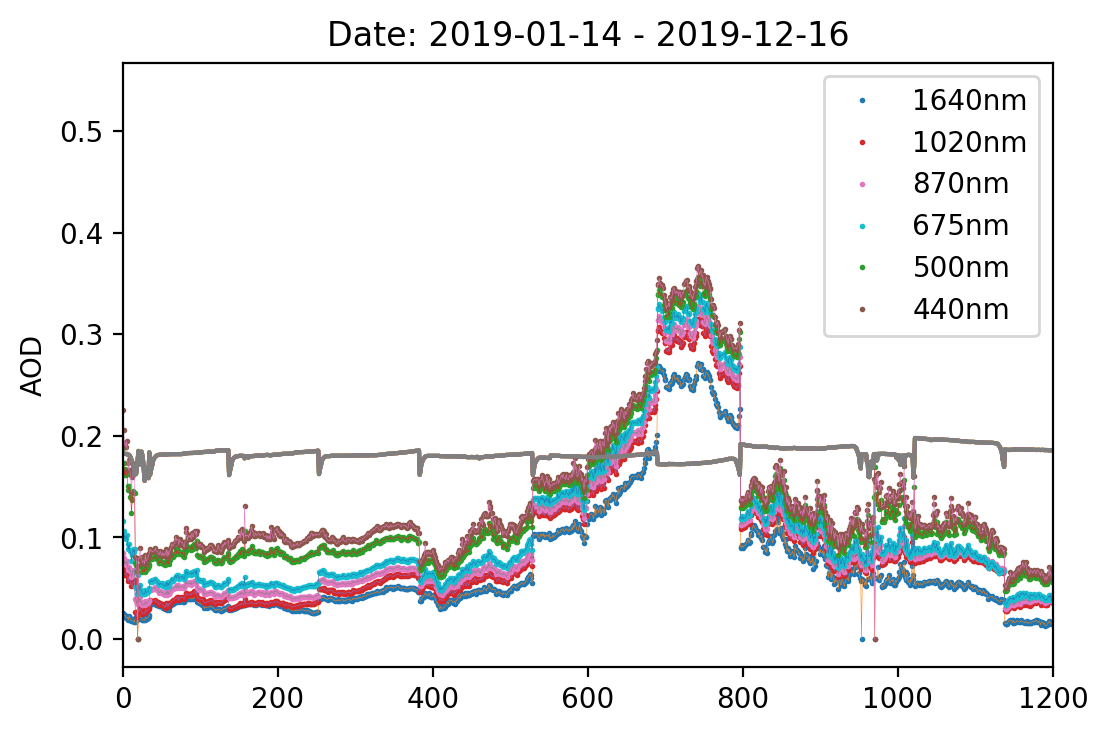

In [804]:
#shows graphs for each band (some bands have no data)

nvalues=10000

fig,ax=subplots(dpi=200)
for i in range(len(non_empty_aod[0])):
    ax.plot(arange(11481-5000),data_aod[5000:,non_empty_aod[0,i]],'.', markersize=2,label=bands_aod[non_empty_aod[0,i]][4:])
    ax.plot(arange(11481-5000),data_aod[5000:,non_empty_aod[0,i]],linewidth=0.2)
    ax.plot(arange(len(cosqm_value)),cosqm_value[:,5]/100)
vals=data_aod[:14]
    
ax.legend()
ax.set_ylabel('AOD')
ax.set_title('Date: ' + str(dates_aod[0,0].date()) +' - ' + str(dates_aod[0,-1].date()))
ax.set_xlim(0,1200)


## COSQM DATA

### Load cosqm data and merger for 2 days (complete night cycle)

In [337]:
###def readfile from web, copied from etalonnage_initial.ipynb and modified a lot
#load file from server test cosqm001
from urllib.request import urlopen, Request

def load_web_data(path):
    try:
        request = Request(path)
        data_server = urlopen(request)
        data_server=loadtxt(data_server, usecols=list(arange(2,17)), unpack=True)
        data_server=swapaxes(data_server,0,1)
        date_server = urlopen(request)
        dates_str=genfromtxt(date_server, delimiter=' ', usecols=[0,1],unpack=True,dtype='str')
        dates_list=[datetime.strptime(dates, '%Y-%m-%d') for dates in dates_str[0,:]]
        times_list=[datetime.strptime(dates, '%H:%M:%S') for dates in dates_str[1,:]]
        dates_cosqm=array([dates_list, times_list])
        dates_cosqm=swapaxes(dates_cosqm,0,1)
        return data_server, dates_cosqm
    except: print('data '+str(path)+' is empty')
    
    
def load_web_data_merge(path1, path2):          #modified with skip on inexistant files
    request1 = Request(path1)
    try:
        data_server11 = urlopen(request1)
        data_server1=loadtxt(data_server11, usecols=list(arange(2,17)), unpack=True)
        data_server1=swapaxes(data_server1,0,1)
        
            #data2 (DAY AFTER)
        request2 = Request(path2)
        try:
            data_server22 = urlopen(request2)
            data_server2=loadtxt(data_server22, usecols=list(arange(2,17)), unpack=True)
            data_server2=swapaxes(data_server2,0,1)
            data_server=concatenate((data_server1,data_server2))    #add both days together
        except: print ('data '+str(path2)+' is empty')
    except: print ('data '+str(path1)+' is empty')
    


    
    #DATES
    request1 = Request(path1)
    try:
        data_server11 = urlopen(request1)
        dates_str11=genfromtxt(data_server11, delimiter=' ', usecols=[0,1],unpack=True,dtype='str')
        dates_list1=[datetime.strptime(dates, '%Y-%m-%d') for dates in dates_str11[0,:]]
        times_list1=[datetime.strptime(dates, '%H:%M:%S') for dates in dates_str11[1,:]]
        dates_cosqm1=array([dates_list1, times_list1])
        dates_cosqm1=swapaxes(dates_cosqm1,0,1)
        
        request2 = Request(path2)
        try:
            data_server22 = urlopen(request2)
            dates_str22=genfromtxt(data_server22, delimiter=' ', usecols=[0,1],unpack=True,dtype='str')
            dates_list2=[datetime.strptime(dates, '%Y-%m-%d') for dates in dates_str22[0,:]]
            times_list2=[datetime.strptime(dates, '%H:%M:%S') for dates in dates_str22[1,:]]
            dates_cosqm2=array([dates_list2, times_list2])
            dates_cosqm2=swapaxes(dates_cosqm2,0,1)
            dates_cosqm=concatenate((dates_cosqm1,dates_cosqm2))    #add both days together 
        
            return data_server, dates_cosqm    #outputs cosqm merged data, and merged dates as 2 datetime objects
        except: print ('data '+str(path2)+' is empty')
    except: print ('date '+str(path1)+' is empty')
        
        
        
def load_local_data_merge(path1, path2):          #modified with skip on inexistant files
    try:
        data_server1=loadtxt(path1, usecols=list(arange(2,17)), unpack=True)
        data_server1=swapaxes(data_server1,0,1)
        
            #data2 (DAY AFTER)
        request2 = Request(path2)
        try:
            data_server2=loadtxt(path2, usecols=list(arange(2,17)), unpack=True)
            data_server2=swapaxes(data_server2,0,1)
            data_server=concatenate((data_server1,data_server2))    #add both days together
        except: print ('data '+str(path2)+' is empty')
    except: print ('data '+str(path1)+' is empty')
    


    
    #DATES
    try:
        dates_str11=genfromtxt(path1, delimiter=' ', usecols=[0,1],unpack=True,dtype='str')
        dates_list1=[datetime.strptime(dates, '%Y-%m-%d') for dates in dates_str11[0,:]]
        times_list1=[datetime.strptime(dates, '%H:%M:%S') for dates in dates_str11[1,:]]
        dates_cosqm1=array([dates_list1, times_list1])
        dates_cosqm1=swapaxes(dates_cosqm1,0,1)
        
        request2 = Request(path2)
        try:
            dates_str22=genfromtxt(path2, delimiter=' ', usecols=[0,1],unpack=True,dtype='str')
            dates_list2=[datetime.strptime(dates, '%Y-%m-%d') for dates in dates_str22[0,:]]
            times_list2=[datetime.strptime(dates, '%H:%M:%S') for dates in dates_str22[1,:]]
            dates_cosqm2=array([dates_list2, times_list2])
            dates_cosqm2=swapaxes(dates_cosqm2,0,1)
            dates_cosqm=concatenate((dates_cosqm1,dates_cosqm2))    #add both days together 
        
            return data_server, dates_cosqm    #outputs cosqm merged data, and merged dates as 2 datetime objects
        except: print ('data '+str(path2)+' is empty')
    except: print ('date '+str(path1)+' is empty')

7


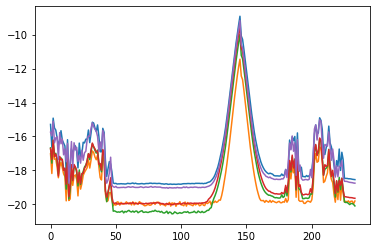

In [6]:
print(data[1][0,0].month)
plot(-data[0][:,5:10])

In [546]:
def AutoPlot_day(path1,path2,plot=True):
    try:  
        data,dates=load_local_data_merge(path1, path2)
        #find interval for 1 cycle
        start=argmin(data[:int(len(data[:,5])/2),5])
        stop=argmin(data[int(len(data[:,5])/2)+50:,5])+int(len(data[:,5])/2)+50

        #print('start,stop:',start, stop)
        data_trim=data[start:stop]
        dates_trim=dates[start:stop]
        #compute mean for mag higher than 14
        meanval=arange(5.0)
        meanval[0]=ma.masked_where(data_trim[:,5] < 14, data_trim[:,5]).mean()
        meanval[1]=ma.masked_where(data_trim[:,6] < 14, data_trim[:,6]).mean()
        meanval[2]=ma.masked_where(data_trim[:,7] < 14, data_trim[:,7]).mean()
        meanval[3]=ma.masked_where(data_trim[:,8] < 14, data_trim[:,8]).mean()
        meanval[4]=ma.masked_where(data_trim[:,9] < 14, data_trim[:,9]).mean()

        if plot==True:
            fig,ax=subplots(1,1,dpi=180,figsize=(4,4))
            xs=arange(stop)
            ax.plot(xs, -data[:stop,5], 'k.', markersize=1)
            ax.plot(xs, -data[:stop,6], 'r.', markersize=1)
            ax.plot(xs, -data[:stop,7], 'g.', markersize=1)
            ax.plot(xs, -data[:stop,8], 'b.', markersize=1)
            ax.plot(xs, -data[:stop,9], 'y.', markersize=1)
            ax.plot(xs, -data[:stop,5], 'k', linewidth=0.3)
            ax.plot(xs, -data[:stop,6], 'r', linewidth=0.3)
            ax.plot(xs, -data[:stop,7], 'g', linewidth=0.3)
            ax.plot(xs, -data[:stop,8], 'b', linewidth=0.3)
            ax.plot(xs, -data[:stop,9], 'y', linewidth=0.3)        

            textstr = '\n'.join((
            r'mean:',
            r'k =' +str( meanval[0] )[:5],
            r'r =' +str( meanval[1] )[:5],
            r'g =' +str( meanval[2] )[:5],
            r'b =' +str( meanval[3] )[:5],
            r'y =' +str( meanval[4] )[:5]))
            # these are matplotlib.patch.Patch properties
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            # place a text box in upper left in axes coords
            ax.text(0.3, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', bbox=props)

            ax.set_xlabel('$Time$')
            ax.set_ylabel('$Mag/arcsec^2$')
            ax.set_xlim(start, stop)
            
            

        return (meanval,data_trim),dates_trim
    except:return 
#        print('AutoPlotDay failed')

def GetMeanMonth(month):
    days_per_month=[31,28,31,30,31,30,31,31,30,31,30,31]
    month_days=days_per_month[month-1]
    
    month_means=list()
    for i in range(month_days):
        #define paths
        day=i+1
        if day<9:
            pathstr1='0'+str(day)
            pathstr2='0'+str(day+1)
            if month<10:
                str_month='0'+str(month)
            else:
                str_month=str(month)
        elif day==9:
            pathstr1=str(0)+str(day)
            pathstr2=str(day+1)
            if month<10:
                str_month='0'+str(month)
            else:
                str_month=str(month)
        else:
            pathstr1=str(day)
            pathstr2=str(day+1)
            if month<10:
                str_month='0'+str(month)
            else:
                str_month=str(month)
        path1=r'http://vpn.izana.org:5080/data/2019/'+str_month+'/2019-'+str_month+'-'+pathstr1+'.txt'
        path2=r'http://vpn.izana.org:5080/data/2019/'+str_month+'/2019-'+str_month+'-'+pathstr2+'.txt'
        print(path1,path2)
        means=AutoPlot_day(path1,path2,plot=False)
        month_means.append(means)
    
    return month_means


# comparison graph COSQM-vs-AOD

In [9]:
from scipy.optimize import curve_fit

In [966]:
###FIND CLOSEST TIME VALUES FROM AOD TO COSQM

#AOD dates, sorted by month, day and value is total seconds in that day


#increments for months for computing seconds
days_per_month=[0,31,59,90,120,151,181,212,243,273,304,334]
    
    
#Define path from month and day of measurement on AOD

def find_closest(array1,index,local=True):
    
    #define paths
    month=array1[0,index].month
    day=array1[0,index].day
    hour=array1[1,index].hour
    
    #correct for bad idx check if time is early
    if hour<10:
        day=day
        
    #make path string
    if day<9:
        pathstr1='0'+str(day)
        pathstr2='0'+str(day+1)
        if month<10:
            str_month='0'+str(month)
        else:
            str_month=str(month)
    elif day==9:
        pathstr1=str(0)+str(day)
        pathstr2=str(day+1)
        if month<10:
            str_month='0'+str(month)
        else:
            str_month=str(month)
    else:
        pathstr1=str(day)
        pathstr2=str(day+1)
        if month<10:
            str_month='0'+str(month)
        else:
            str_month=str(month)
            
    if local==True:
        path1=r'C:/Users/Utilisateur/Documents/university/cosqm/aod/cosqm_santa_cruz/vpn.izana.org/data/2019/'+str_month+'/2019-'+str_month+'-'+pathstr1+'.txt'
        path2=r'C:/Users/Utilisateur/Documents/university/cosqm/aod/cosqm_santa_cruz/vpn.izana.org/data/2019/'+str_month+'/2019-'+str_month+'-'+pathstr2+'.txt'    

    else:
        path1=r'http://vpn.izana.org:5080/data/2019/'+str_month+'/2019-'+str_month+'-'+pathstr1+'.txt'
        path2=r'http://vpn.izana.org:5080/data/2019/'+str_month+'/2019-'+str_month+'-'+pathstr2+'.txt'

    print (path1)
    print (path2)
    #Define time in seconds for AOD
    dates_aod_seconds=zeros(len(array1[1]))
    for i in range(len(array1[1])):
        dates_aod_seconds[i]=days_per_month[array1[0,i].month-1]*24*3600+(array1[0,i].day-1)*24*3600+array1[1,i].hour*3600+array1[1,i].minute*60+array1[1,i].second

    
    #Download data from this day (night)
    data,dates=AutoPlot_day(path1,path2,plot=False)
    lenght=len(dates[:,0])-1
    dates_cosqm_seconds=zeros(lenght)
    for i in range(lenght):
        dates_cosqm_seconds[i]=(dates[i,0].month-1)*30*24*3600+dates[i,0].day*24*3600+dates[i,1].hour*3600+dates[i,1].minute*60+dates[i,1].second

    

    #find nearest time value for cosqm corresponding to aod measurement
    idx = abs(dates_cosqm_seconds-dates_aod_seconds[index]).argmin()
    
    delta_t=dates_cosqm_seconds[idx]-dates_aod_seconds[index]
#     print (type(data[1][idx]))
    
    if -1000<delta_t<1000:
        cosqm_value1=data[1][idx]
    else: 
        cosqm_value1=array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    
    i=index
    print ('AERONET: ',days_per_month[month-1]*24*3600,(array1[0,i].day-1)*24*3600,array1[1,i].hour*3600,array1[1,i].minute*60,array1[1,i].second)
    print ('COSQM:   ',days_per_month[(dates[idx,0].month-1)]*24*3600,(dates[idx,0].day-1)*24*3600,dates[idx,1].hour*3600,dates[idx,1].minute*60,dates[idx,1].second)
    print ( days_per_month[month-1]*24*3600+(array1[0,i].day-1)*24*3600+array1[1,i].hour*3600+array1[1,i].minute*60+array1[1,i].second)
    print ('AERONET month,day = ',month, day)
    print ('COSQM   month,day = ',dates[idx,0].month, dates[idx,0].day)

    print ('AERONET h:m:s = ',array1[1,i].hour, array1[1,i].minute, array1[1,i].second)
    print ('COSQM   h:m:s = ',dates[idx,1].hour, dates[idx,1].minute, dates[idx,1].second)

    print ('idx=',idx)
    print ('delta t= ',delta_t)
    print ('----------------')
    
    
#    return cosqm_value,idx,dates_aod_seconds,dates_cosqm_seconds

    return cosqm_value1,delta_t
    

In [971]:
#TESTING 
#Get data

july=arange(6339)

cosqm_value=[]
delta_ts=[]

# for i in july:
#     data,delta_t=find_closest(dates_aod,i,local=True)
#     cosqm_value.append(data)
#     delta_ts.append(delta_t)

data,delta_t=find_closest(dates_aod,6407,local=True)
cosqm_value.append(data)
delta_ts.append(delta_t)
    
cosqm_value=array(cosqm_value)

# print(dates_aod[0,4269])


C:/Users/Utilisateur/Documents/university/cosqm/aod/cosqm_santa_cruz/vpn.izana.org/data/2019/08/2019-08-09.txt
C:/Users/Utilisateur/Documents/university/cosqm/aod/cosqm_santa_cruz/vpn.izana.org/data/2019/08/2019-08-10.txt
AERONET:  18316800 691200 0 360 46
COSQM:    18316800 777600 0 360 49
19008406
AERONET month,day =  8 9
COSQM   month,day =  8 10
AERONET h:m:s =  0 6 46
COSQM   h:m:s =  0 6 49
idx= 100
delta t=  3.0
----------------


20085
Correlations:
-----
AOD_1640nm (0.16111989838202, 1.1355448461486495e-24)
AOD_1020nm (0.16111989838202, 1.1355448461486495e-24)
AOD_870nm (0.16111989838202, 1.1355448461486495e-24)
AOD_675nm (0.16111989838202, 1.1355448461486495e-24)
AOD_500nm (0.16111989838202, 1.1355448461486495e-24)
AOD_440nm (0.16111989838202, 1.1355448461486495e-24)


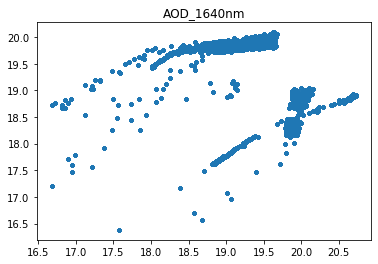

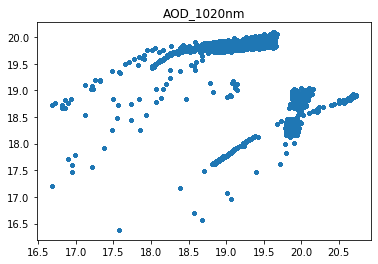

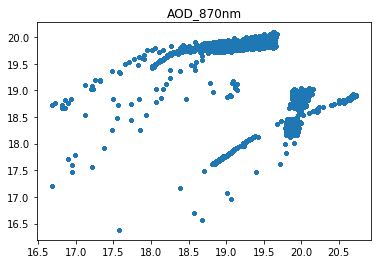

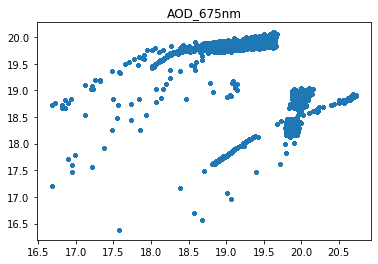

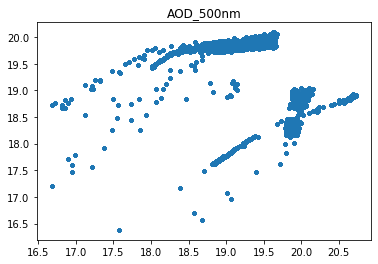

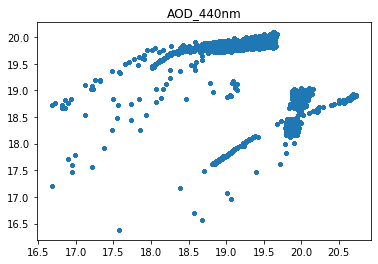

In [877]:
###Values of each band
#[[ 0  1  2  5 14 17]]
#[['AOD_1640nm' 'AOD_1020nm' 'AOD_870nm' 'AOD_675nm' 'AOD_500nm' 'AOD_440nm']]
cosqm_value=array(cosqm_value)
non_zeros=array(nonzero(cosqm_value))
print(len(non_zeros[0]))

print ('Correlations:')
print ('-----')
for band in non_empty_aod[0]:
    fig=figure()
    title(str(bands_aod[band]))
    #plot(data_aod[5000+non_zeros[0],band],cosqm_value[non_zeros,5][0]**(1/2)/cosqm_value[non_zeros,6][0],'.')
    plot(cosqm_value[non_zeros,8][0],cosqm_value[non_zeros,6][0],'.')

    #correlation values
    #corr=pearsonr(data_aod[5000+non_zeros,band],array(cosqm_value)[non_zeros,5]-array(cosqm_value)[non_zeros,9])

    print (bands_aod[band], corr)

    
#plot(array(cosqm_value)[:,],data_aod[4268:6000,band],'.')

# for band in non_empty_aod:
#     for i in range (5):
#         fig=figure()
#         plot(data_aod[4268:6000,band],array(cosqm_value)[:,i],'.')
#         title('band')



In [924]:
test=genfromtxt('cosqm_santa_cruz/vpn.izana.org/data/2019/08/2019-08-09.txt')

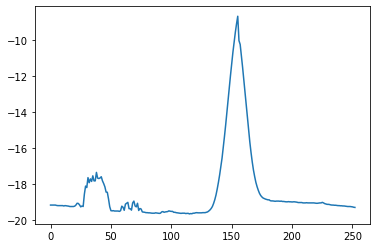

In [936]:
plot(-test[:,10])